$$I=2 \pi \int{j_z r dr}$$
$$\epsilon = \frac{B_{\theta v}}{B_{\theta p}} $$
$$B_{z}=\frac{\mu_0 I}{\pi a \bar{\lambda}}$$
$$\beta = \frac{2 \mu_0 p}{B_\theta^{2} + B_{z}^{2}}$$

In [1]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set_style('whitegrid')
sns.set_context('talk', font_scale = 2.)

import numpy as np
import scipy.constants as consts
import scipy.integrate as integ
import sys
sys.path.append('..')

In [5]:
import equil_solver as es
reload(es)

<module 'equil_solver' from '../equil_solver.pyc'>

In [20]:
import newcomb as new
import numpy as np

In [21]:
def normalized_plots(profile):
    
    splines = profile.get_splines()
    beta_spl = profile.beta(profile.r)
    r = np.linspace(0, 1, 250)
    
    j_skin = profile.j_skin
    #current = splines['b_theta'](1)*2.*np.pi*1/(profile.mu_0)
    b_z0 = profile.b_z0
    
    fig = plt.figure(1, figsize=(8,12))
    gs1 = gridspec.GridSpec(4, 1)
    axs = [fig.add_subplot(ss) for ss in gs1]
    
    axs[0].plot(r, splines['j_z'](r), lw=5, color='green')
    axs[1].plot(r, splines['b_theta'](r), lw=5, color='red')
    axs[2].plot(r, splines['pressure'](r), lw=5, color='orange')
    axs[3].plot(r, splines['q'](r), lw=5, color='blue')
    
    for i in range(len(axs)):
        axs[i].set_xlabel(r'$r$', fontsize=25)
        axs[i].axvline(x=0.4, color='grey', ls='--', lw=5)
        axs[i].axvline(x=0.6, color='grey', ls='--', lw=5)
        axs[i].axvline(x=0.8, color='grey', ls='--', lw=5)
    axs[0].set_ylabel(r'$j_{z}$', fontsize=30)
    axs[1].set_ylabel(r'$B_{\theta}$', fontsize=30)
    axs[2].set_ylabel(r'$p$', fontsize=30)
    axs[3].set_ylabel(r'$q$', fontsize=30)
    axs[3].set_ylim(0., 8.3)
    
    
    fig.suptitle(r'$\epsilon=0.1$'+
                 r'   $\bar{\lambda}=1.0$'+
                 r'   $\bar{k}=$0.5', fontsize=30)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.setp(axs[0].get_xticklabels(), fontsize=20)
    plt.setp(axs[1].get_xticklabels(), fontsize=20)
    plt.setp(axs[2].get_xticklabels(), fontsize=20)
    plt.setp(axs[3].get_xticklabels(), fontsize=20)
    
    plt.setp(axs[0].get_yticklabels(), fontsize=20)
    plt.setp(axs[1].get_yticklabels(), fontsize=20)
    plt.setp(axs[2].get_yticklabels(), fontsize=20)
    plt.setp(axs[3].get_yticklabels(), fontsize=20)
    
    axs[0].locator_params(nbins=4)
    axs[1].locator_params(nbins=4)
    axs[2].locator_params(nbins=4)
    axs[3].locator_params(nbins=4)
    plt.show()

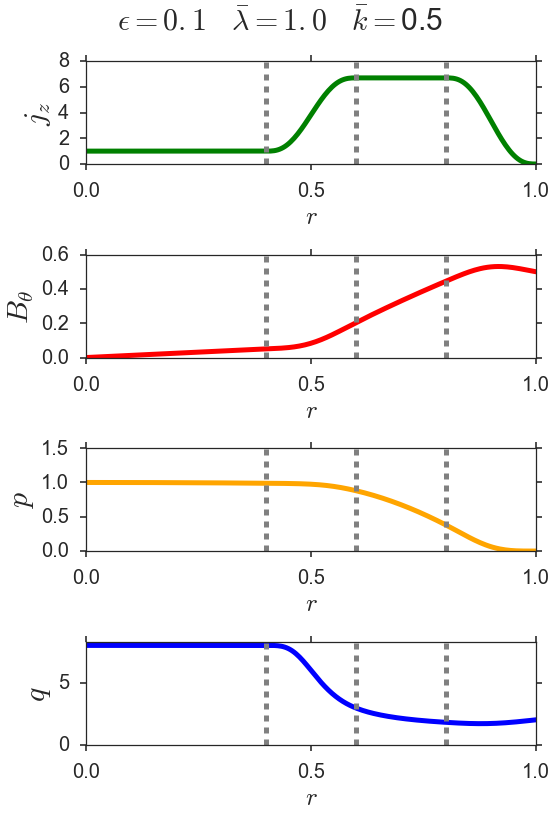

In [22]:
normalized_plots(es.UnitlessSmoothedCoreSkin(epsilon=0.1, lambda_bar=1.0, k_bar=1., transition_width_norm=0.2, 
                                             skin_width_norm=0.2, core_radius_norm=0.4))

In [23]:
def normalized_single_plot(profile):
    
    splines = profile.get_splines()
    beta_spl = profile.beta(profile.r)
    r = np.linspace(0, 1, 250)
    
    j_skin = profile.j_skin
    #current = splines['b_theta'](1)*2.*np.pi*1/(profile.mu_0)
    b_z0 = profile.b_z0
    
    fig = plt.figure(1, figsize=(15,7))
    axes = fig.gca()
    
    axes.plot(r, splines['j_z'](r), lw=5)
    axes.plot(r, splines['b_theta'](r), lw=5)
    axes.plot(r, splines['pressure'](r), lw=5)
    axes.plot(r, splines['q'](r), lw=5)
    
    axes.set_xlabel(r'$r$', fontsize=25)
    axes.axvline(x=0.4, color='grey', ls='--', lw=5)
    axes.axvline(x=0.6, color='grey', ls='--', lw=5)
    axes.axvline(x=0.8, color='grey', ls='--', lw=5)
            #if not (i == 1 and j == 1):
                #axs[i, j].set_ylim(-0.1, 1.1)
    axes.set_ylim(0., 2.3)
    
    
    fig.suptitle(r'$\epsilon=1.0$'+
                 r'   $\bar{\lambda}=1.0$'+
                 r'   $\bar{k}=$0.5', fontsize=25)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.setp(axes.get_xticklabels(), fontsize=20)
    plt.setp(axes.get_yticklabels(), fontsize=20)
    plt.show()

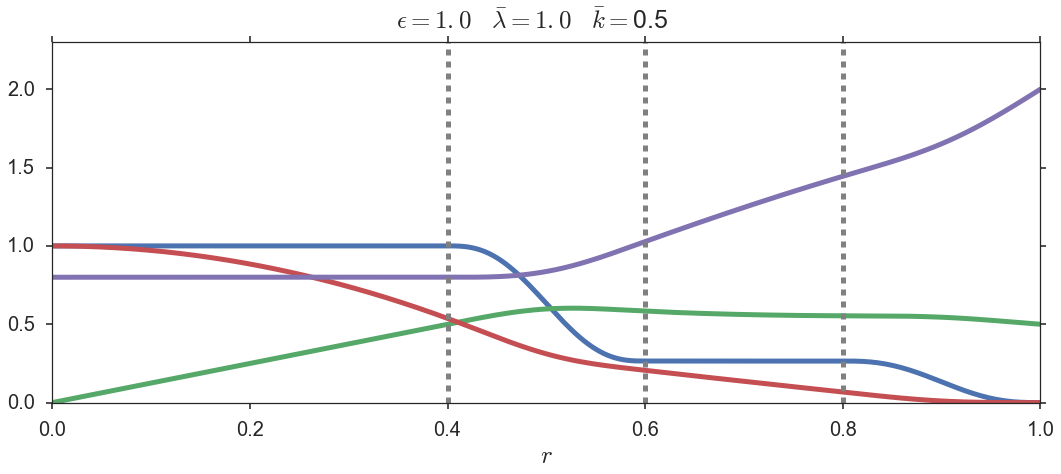

In [24]:
normalized_single_plot(es.UnitlessSmoothedCoreSkin(epsilon=1.0, lambda_bar=1.0, k_bar=1., transition_width_norm=0.2, 
                                             skin_width_norm=0.2, core_radius_norm=0.4))